# Reconnaissance des Digits basée sur les enregistrements Audios 

### Importer les bibliothéques necessaires 

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from Tools.tools import rec
from Tools.tools import collection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier


C:\Users\utilisateur\anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import warnings
warnings.filterwarnings('ignore')

### Collection 

In [3]:
#collection()

#### 1. Importer votre DataSet

In [4]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])

##### Print

In [5]:
mydata.head(11)

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,13.481517,-31.851355,-4.851970,-8.321583,-1.463109,-8.099985,-2.326285,-1.540770,-0.551869,-1.784855,-0.793803,-0.932979,0.0
1,11.715697,-28.043413,-5.141512,-8.432868,-3.335683,-9.392343,-0.309920,0.044392,-0.128058,-1.853225,-2.570185,0.133672,1.0
2,10.451600,-28.579900,-6.451272,-8.095307,-0.406414,-7.307607,-0.174653,-2.252004,-5.029072,-4.699203,-2.378585,-0.538692,2.0
3,9.939052,-30.662863,-5.725288,-10.543627,-6.202146,-11.700844,-2.440937,-0.554714,1.247607,1.100560,-0.910360,-2.137901,3.0
4,10.609325,-28.953223,-10.035024,-11.681134,-3.977335,-10.565003,0.958430,1.669359,-1.781917,-1.403716,1.190149,1.476161,4.0
5,11.472922,-27.502232,-8.447942,-8.034206,-0.244332,-8.956638,-0.481482,-1.223267,-2.800208,-3.843630,-3.362444,-0.899208,5.0
6,14.652252,-32.161181,-11.078513,-1.936705,-0.873364,-11.742447,5.718357,-2.551098,-5.642173,1.228261,-1.273229,-0.614285,6.0
7,10.516205,-29.084525,-9.570402,-10.956932,-2.378919,-8.763068,-0.230334,-2.831689,-4.660779,-1.167214,2.887998,2.648579,7.0
8,13.670591,-25.181530,-4.722859,-3.895456,1.223786,-9.091931,-2.480710,-7.635310,-8.529226,-2.921849,-0.881804,0.205479,8.0
9,11.699487,-26.211017,-10.890272,-8.181535,1.175208,-9.427393,0.881483,-1.921829,-5.264609,-2.335015,-0.918496,1.161193,9.0


In [6]:
mydata.shape

(200, 13)

#### 2. Checker les variables quantitatives/qualitatives et les valeurs manquantes 

In [7]:
mydata.isna().sum()

Fe1       0
Fe2       0
Fe3       0
Fe4       0
Fe5       0
Fe6       0
Fe7       0
Fe8       0
Fe9       0
Fe10      0
Fe11      0
Fe12      0
Target    0
dtype: int64

#### 3. Visualiser les targets

In [8]:
mydata['Target'].value_counts()

0.0    20
1.0    20
2.0    20
3.0    20
4.0    20
5.0    20
6.0    20
7.0    20
8.0    20
9.0    20
Name: Target, dtype: int64

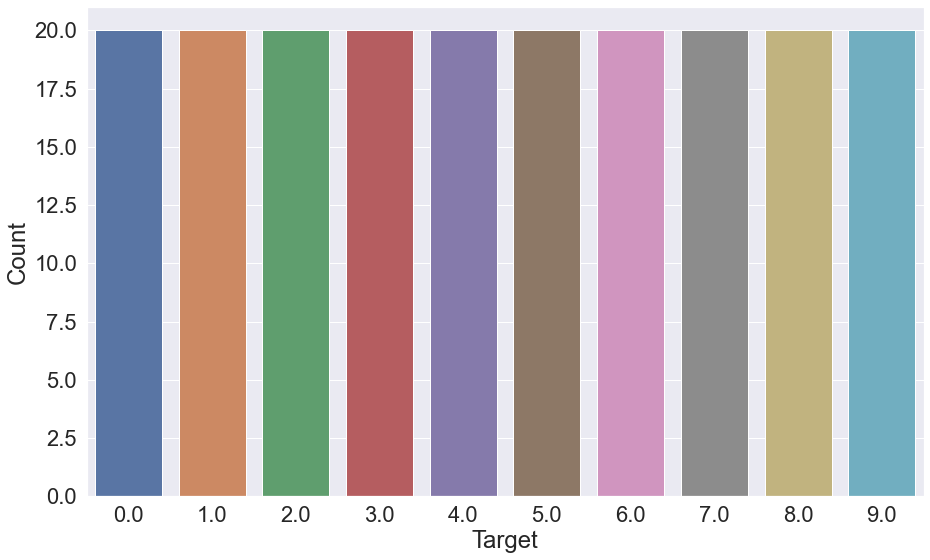

In [9]:
plt.figure(1,figsize=(15,9))
sb.countplot(x='Target', data=mydata, palette="deep")
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

#### Réduction des dimensions (PCA)

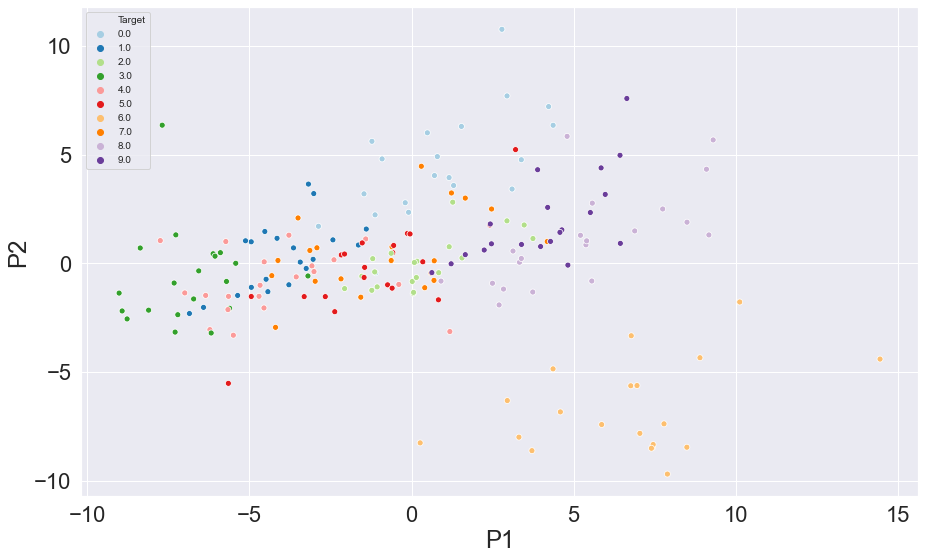

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df2 = pd.DataFrame(pca.fit_transform(mydata.iloc[:, :-1]))

df2["Target"] = mydata["Target"]
df2.columns = ["P1","P2","Target"]


plt.figure(1,figsize=(15,9))
plt.clf()
sns.scatterplot(x="P1",y="P2",hue="Target",data=df2, palette = "Paired", )



#plt.plot(x,y,"+")

plt.xlabel('P1')
plt.ylabel('P2')
plt.legend(loc=2, prop={'size': 10})
plt.show()

#### 4. Notre variable target (Y) est 'gender', Récuprer X et y à partir du jeu de données 

In [10]:
y = mydata['Target']
X = mydata.iloc[:,:-1]
X.shape

(200, 12)

In [11]:
y.shape

(200,)

#### 5. Diviser la DataSet en donneés d'apprentissage et de test (20% pour le test)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f"Les dimensions de : {X_train.shape = }, {X_test.shape = }, {y_train.shape = }, {y_test.shape = }")

Les dimensions de : X_train.shape = (160, 12), X_test.shape = (40, 12), y_train.shape = (160,), y_test.shape = (40,)


#### 6. Appliquer une normalisation centrée-réduite aux données en utilisant "StandardScaler"

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [14]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)

In [15]:
X_test_scaled.mean()

Fe1    -0.054426
Fe2     0.018950
Fe3     0.061758
Fe4    -0.212109
Fe5    -0.177811
Fe6    -0.015671
Fe7    -0.089339
Fe8     0.025649
Fe9    -0.004453
Fe10   -0.213113
Fe11   -0.102162
Fe12    0.070112
dtype: float64

In [16]:
X_test_scaled.std()

Fe1     1.202137
Fe2     1.347444
Fe3     1.184182
Fe4     0.988068
Fe5     0.935800
Fe6     0.908432
Fe7     0.980137
Fe8     0.860093
Fe9     0.856293
Fe10    1.028791
Fe11    0.995814
Fe12    1.059343
dtype: float64

#### 7. Développer votre meilleur modèle de classification

In [17]:
model = {'key_word' : ['svc', 'knn', 'tree', 'random_forest'], 'model' : [SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier]}
dict = {'key_word' : 'svc', 'a':1, 'b': 2}
for key, value in model.items():
    print(key)
    print(value)


key_word
['svc', 'knn', 'tree', 'random_forest']
model
[SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), <class 'sklearn.ensemble._forest.RandomForestClassifier'>]


In [20]:
model_name = ['svc', 'knn', 'decision_tree', 'random_forest', 'boost', 'XGB', 'MLP']
pipelines = [
             Pipeline([('scaler', StandardScaler()), ('svc', SVC())]),
             Pipeline([('scaler', StandardScaler()), ('knn',  KNeighborsClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('decision_tree', DecisionTreeClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('forest', RandomForestClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('boost', GradientBoostingClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('XGB', XGBClassifier())]),
             Pipeline([('scaler', StandardScaler()), ('MLP', MLPClassifier())])]

parameters =[{'svc__kernel': ['linear', 'rbf'],
               'svc__C':[1, 10]}, 
            {'knn__n_neighbors': np.arange(1, 10), 
              'knn__metric':["euclidean", "minkowski", "manhattan"]},
             {},
             {'forest__n_estimators': np.arange(100, 125)},
             {'boost__loss' : ['deviance', 'boost__exponential'], 'boost__learning_rate' : [0.1, 0.2, 0.3]},
             {'XGB__eta' : [0.1, 0.2, 0.3, 0.4], 'XGB__max_depth' : [2, 4, 6, 8, 10], 'XGB__eval_metric' : ['mlogloss']},
             {'MLP__hidden_layer_sizes' : [(50,), (100,), (150,)], 'MLP__activation' : ['identity', 'logistic', 'tanh', 'relu']}]


score = []
best_param = []


for model, p, name in zip(pipelines, parameters, model_name):
        exp = GridSearchCV(model, param_grid = p)
        exp.fit(X_train, y_train)
        score.append([name, exp.score(X_test, y_test), exp.best_params_])
        #best_param.append(exp.best_params_)        


In [21]:
sorted(score, key=itemgetter(1), reverse=True)

[['MLP', 0.925, {'MLP__activation': 'tanh', 'MLP__hidden_layer_sizes': (50,)}],
 ['svc', 0.9, {'svc__C': 1, 'svc__kernel': 'rbf'}],
 ['knn', 0.85, {'knn__metric': 'manhattan', 'knn__n_neighbors': 8}],
 ['random_forest', 0.8, {'forest__n_estimators': 110}],
 ['XGB',
  0.775,
  {'XGB__eta': 0.3, 'XGB__eval_metric': 'mlogloss', 'XGB__max_depth': 2}],
 ['decision_tree', 0.675, {}],
 ['boost', 0.675, {'boost__learning_rate': 0.3, 'boost__loss': 'deviance'}]]

In [38]:
from joblib import dump, load
dump(MLPClassifier(activation= 'tanh', hidden_layer_sizes= (50,)) , 'model_MLP')

['model_MLP']

# Application en Temps Réel

In [22]:
from Tools.tools import rec
from Tools.tools import collection


#### Test sur le modèle du SVC

In [ ]:
model = SVC(C= 1, kernel= 'rbf')
model.fit(X_train_scaled, y_train)

In [ ]:
rec(scaler, model)

#### Test sur le modèle MLP

In [31]:
#model_MLP_scaled = MLPClassifier(activation= 'tanh', hidden_layer_sizes= (50,))
#model_MLP_scaled.fit(X_train_scaled, y_train)

In [40]:
m_jlib = load('model_MLP')
m_jlib.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50,))

In [41]:
rec(scaler, model_MLP_scaled)

Attention, l'enregistrement commence dans :
5
4
3
2
1
0
Prononcer votre Digit : 
------------------
Digit :  8.0
------------------


#### Résultats avec les modèles SVC et MLP

In [42]:
d = {'essai1': [1, 1, 1, 1, 1, 0, 1, 1, 1, 1], 'essai2': [1, 1, 1, 1, 1, 0, 1, 1, 1, 1], 'essai3': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
score_svc = pd.DataFrame(data=d, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
score_svc

,essai1,essai2,essai3
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,0,0,1
6,1,1,1
7,1,1,1
8,1,1,1
9,1,1,1


In [ ]:
sns.pairplot(mydata, hue='Target', corner = True)

In [43]:
d2 = {'essai1': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'essai2': [1, 1, 1, 1, 0, 1, 1, 1, 1, 1], 'essai3': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
score_mlp = pd.DataFrame(data=d2, index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
score_mlp['Total'] = score_mlp.sum()
score_mlp

,essai1,essai2,essai3,Total
0,1,1,1,NaN
1,1,1,1,NaN
2,1,1,1,NaN
3,1,1,1,NaN
4,1,0,1,NaN
5,1,1,1,NaN
6,1,1,1,NaN
7,1,1,1,NaN
8,1,1,1,NaN
9,1,1,1,NaN


In [44]:
score_mlp.sum()

essai1    10.0
essai2     9.0
essai3    10.0
Total      0.0
dtype: float64